### NORMALIZED TAG RATIO GRAPH

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
closeData=pd.read_csv("tagCount4Reasons.csv") #4 reasons for closure(excluding duplicate)
openData=pd.read_csv("tagWithOpenCount.csv")

In [24]:
closeData.shape

(20666, 3)

In [25]:
openData.shape

(54126, 3)

In [26]:
tagWeightData=closeData.merge(openData,how="outer")
print(tagWeightData.head())
print(tagWeightData.shape)

   TagId  countOfQuesClosed     TagName  countOfQuesStillOpen
0      1             4768.0        .net              263882.0
1      2            18998.0        html              747022.0
2      3            27528.0  javascript             1645699.0
3      4            12759.0         css              535258.0
4      5            29303.0         php             1160245.0
(54158, 4)


In [27]:
tagWeightData[tagWeightData['TagId']==26]

,TagId,countOfQuesClosed,TagName,countOfQuesStillOpen
20666,26,NaN,j#,57.0


In [28]:
tagWeightData.replace(np.nan,0,inplace=True)

In [29]:
tagWeightData[tagWeightData['TagId']==26]

,TagId,countOfQuesClosed,TagName,countOfQuesStillOpen
20666,26,0.0,j#,57.0


In [30]:
# tagWeightData['closeCountNorm']=tagWeightData['countOfQuesClosed']
# #/np.sum(tagWeightData['countOfQuesClosed'])
# tagWeightData['openCountNorm']=tagWeightData['countOfQuesStillOpen']
# #/np.sum(tagWeightData['countOfQuesStillOpen'])
#tagWeightData['tagWeight']=tagWeightData['countOfQuesClosed']/(tagWeightData['countOfQuesStillOpen']+1)


tagWeightData['tagWeight']=0.0
for lab,row in tagWeightData.iterrows():
    c=tagWeightData.at[lab,'countOfQuesClosed']
    o=tagWeightData.at[lab,'countOfQuesStillOpen']
    if(c!=0 and o!=0):
        tagWeightData.at[lab,'tagWeight']=c/o-o/c
    elif(c==0):
        tagWeightData.at[lab,'tagWeight']=-o
    elif(o==0):
        tagWeightData.at[lab,'tagWeight']=c
    else:
        tagWeightData.at[lab,'tagWeight']=0
    #print(tagWeightData.at[lab,'tagWeight'])

In [31]:
tagWeightData.head()

,TagId,countOfQuesClosed,TagName,countOfQuesStillOpen,tagWeight
0,1,4768.0,.net,263882.0,-55.326311
1,2,18998.0,html,747022.0,-39.295655
2,3,27528.0,javascript,1645699.0,-59.766003
3,4,12759.0,css,535258.0,-41.927570
4,5,29303.0,php,1160245.0,-39.569496


In [32]:
tagWeightData.sort_values(by=['tagWeight'],ascending=False,inplace=True)
print(tagWeightData.iloc[0:10])

        TagId  countOfQuesClosed                    TagName  \
1645     3871              274.0                        gpl   
1730     4089              102.0                       lgpl   
18358  111007               42.0              rosetta-stone   
3743     9968               20.0                    godaddy   
232       474               30.0                   freeware   
13885   73861                9.0                   tool-rec   
4247    11638                5.0                 beautifier   
1713     4061                4.0               publicdomain   
3821    10219                4.0  personal-software-process   
245       508              749.0                      agile   

       countOfQuesStillOpen   tagWeight  
1645                    0.0  274.000000  
1730                    0.0  102.000000  
18358                   0.0   42.000000  
3743                    0.0   20.000000  
232                     3.0    9.900000  
13885                   0.0    9.000000  
4247        

In [33]:
top=25
labels=tagWeightData['TagName'].iloc[0:top]
#print(labels)
indices=[i for i in range(1,top+1)]
#print(indices)
ratios=np.array(tagWeightData['tagWeight'].iloc[0:top] )
#from sklearn.preprocessing import scale
#ratios=scale(ratios)
print(ratios)
print(type(ratios))
print(ratios.shape)

[274.         102.          42.          20.           9.9
   9.           5.           3.75         3.75         3.02848835
   3.           2.66666667   2.66666667   2.           2.
   2.           2.           1.94002618   1.56219512   1.5
   1.5          1.49120645   1.36991022   1.           1.        ]
<class 'numpy.ndarray'>
(25,)


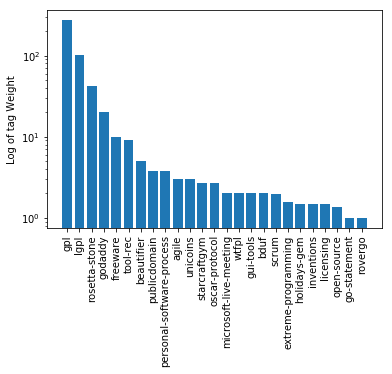

In [34]:
#plt.figure(figsize=(12, 6))
plt.bar(indices,ratios,align='center')
plt.ylabel("Log of tag Weight")
plt.xticks(indices, labels)
plt.xticks(rotation=90)
#plt.title("Tags with top "+str(top)+" Tag Weight")
plt.yscale('log')
plt.show()
#plt.savefig('D:\SAJAL\\foo.png')

In [35]:
# These tags are very different from the most popular tags and includes tags which have a very high chance of getting closed
# 'gpl', 'lgpl' are off topic
# 'godaddy' is going to be removed from Stack overflow tags
# 

### TagWeight method used for feature creation

In [36]:
import re
def calculateTagWeight(tags):
    forClosed=re.findall('<(.*?)>',tags)
    forOpen=tags.split('|')
    #print(forClosed)
    #print(forOpen)
    if(len(forClosed) ):  #if we pass tags for open in close it won't work, but vice versa will work hence 
        # this particular order of if-else 
        tagList=forClosed
    elif(len(forOpen) ):
        tagList=forOpen
    #print(tagList)
    wt=0
#     for t in tagList:
#         #print(t)
#         try:
            
#         except:
#             print(t)
#         print(wt)
#     print("check")
    try:
        for t in tagList:
            wt=wt+tagWeightData[tagWeightData['TagName']==t][['tagWeight']].values[0]
    except:
        #print(tagList)
        pass
    return wt

In [37]:
print("open tags")
print(calculateTagWeight("<javascript><html><arrays><tags>"))
print(calculateTagWeight("c++"))

print("\nclosed tags")
print(calculateTagWeight("<java><multithreading><garbage-collection>")) 
print(calculateTagWeight("<jquery>"))

open tags
[-207.16103078]
[-31.03160177]

closed tags
[-194.98506738]
[-70.53749593]


In [38]:
#Error because php-mail is unavailable in tag list
#tagWeightData[tagWeightData['TagName']=="php-mail"][['tagWeight']].values[0]
tagWeightData[tagWeightData['TagName']=="directory"][['tagWeight']].values[0]

array([-66.34522487])

In [39]:
-59.76600307-39.29565478-37.51353723-70.58583569

-207.16103076999997

In [40]:
tagWeightData.to_csv("tagWeightData.csv")

In [41]:
# one problem with tag weights is there are synonyms available for some tags and hence tag weight are not properly calculated
# for those similar tags 
# https://stackoverflow.com/tags/macos/synonyms